In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [264]:
# Math Helper Funcs
import numpy as np
import math as m

def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

def cyl2cart_3D(r, phi, h):
    x, y = pol2cart(r, phi)
    return [x, y, h]

def sph2cart_3D(sph_coords): #r, phi, theta
    r, phi, theta = sph_coords
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return [x, y, z]

def cart2sph_3D(cart_coords):
    x,y,z = cart_coords
    print(x,y,z)
    XsqPlusYsq = x**2 + y**2
    r = m.sqrt(XsqPlusYsq + z**2)               # r
    theta = m.atan2(z,m.sqrt(XsqPlusYsq))     # theta
    phi = m.atan2(y,x)                           # phi
    return [r, phi, theta]

def link2plot(sphere_coord, sphere_ref_offset, o_coord):
    abs_sphere_coord = np.add(sphere_coord, sphere_ref_offset)
    coordE = np.add(sph2cart_3D(abs_sphere_coord), o_coord)
    coords_xyz = [[o_coord[0], coordE[0]], [o_coord[1], coordE[1]], [o_coord[2], coordE[2]]]
    return coords_xyz

def link2plot_byNodes(coordE, o_coord):
    coords_xyz = [[o_coord[0], coordE[0]], [o_coord[1], coordE[1]], [o_coord[2], coordE[2]]]
    return coords_xyz

def plotLink(ax, coords_xyz, param):
    ax.plot(coords_xyz[0], coords_xyz[1], coords_xyz[2], param)

def deg2rad(deg):
    return deg*m.pi/180

In [285]:
class Link:
    def __init__(self, name, joint_coord, relatie_orientation_SC):
        self.name = name
        self.o_coord = joint_coord #abs. coord of origin joint
        self.orientation = relatie_orientation_SC
        self.sphere_ref_offset = [0, 0, 0]

    def myfunc(self):
        print("Hello my name is " + self.name)
    
    def updateOriginCoord(self, new_coord):
        self.o_coord = new_coord
        
    def updateRefOffet(self, new_offsets):
        self.sphere_ref_offset = new_offsets
        
    def draw(self, ax):
        coords_xyz = link2plot(self.orientation, self.sphere_ref_offset, self.o_coord)
        plotLink(ax, coords_xyz, 'ro-')
    
    def drawRefFrame(self, ax):
        axis_length = 10
        coords = [axis_length,m.pi/2,m.pi/2]
        coords_xyz = link2plot(coords, self.sphere_ref_offset, self.o_coord)
        plotLink(ax, coords_xyz, 'g--')
        coords = [axis_length,0,m.pi/2]
        coords_xyz = link2plot(coords, self.sphere_ref_offset, self.o_coord)
        plotLink(ax, coords_xyz, 'r--')
        coords = [axis_length,m.pi/2,0]
        coords_xyz = link2plot(coords, self.sphere_ref_offset, self.o_coord)
        plotLink(ax, coords_xyz, 'b--')

    
class Arm:
    def __init__(self, name, nDOF, o_coord_cyl, theta_offset, links):
        self.name = name
        self.nDOF = nDOF
        r, phi, h = o_coord_cyl
        self.o_coord = cyl2cart_3D(r, phi, h)
        self.o_coord_cyl = o_coord_cyl
        self.o_coord_cyl[1] = self.o_coord_cyl[1] + theta_offset
        self.links = links
        self.updateLinks()
        
    def updateLinks(self):
        for item in self.links:
            # offset links relative to o_coord
            item.updateRefOffet([0, self.o_coord_cyl[1] , 0])
            item.updateOriginCoord(np.add(self.o_coord,item.o_coord))
    
    def draw(self, ax):
        for item in self.links:
            item.draw(ax)
            
    def drawRefFrame(self, ax):
        coords_xyz = link2plot_byNodes([0,0,0], self.o_coord)
        plotLink(ax, coords_xyz, 'c-')
        for item in self.links:
            item.drawRefFrame(ax)
            
List_arms = []
list_arms_angles = [deg2rad(-10), deg2rad(10), deg2rad(120-10), deg2rad(120+10), deg2rad(240-10), deg2rad(240+10)]
const_ang = 90
list_arms_offset = [-const_ang, const_ang,-const_ang, const_ang,-const_ang, const_ang]
for i in range(6):
    l1 = Link("A1_B1", [0, 0, 0], [5, 0, deg2rad(80)])
    a = Arm("Arm1", 1, [20, list_arms_angles[i], 0], deg2rad(list_arms_offset[i]), [l1])
    List_arms.append(a)

<IPython.core.display.Javascript object>


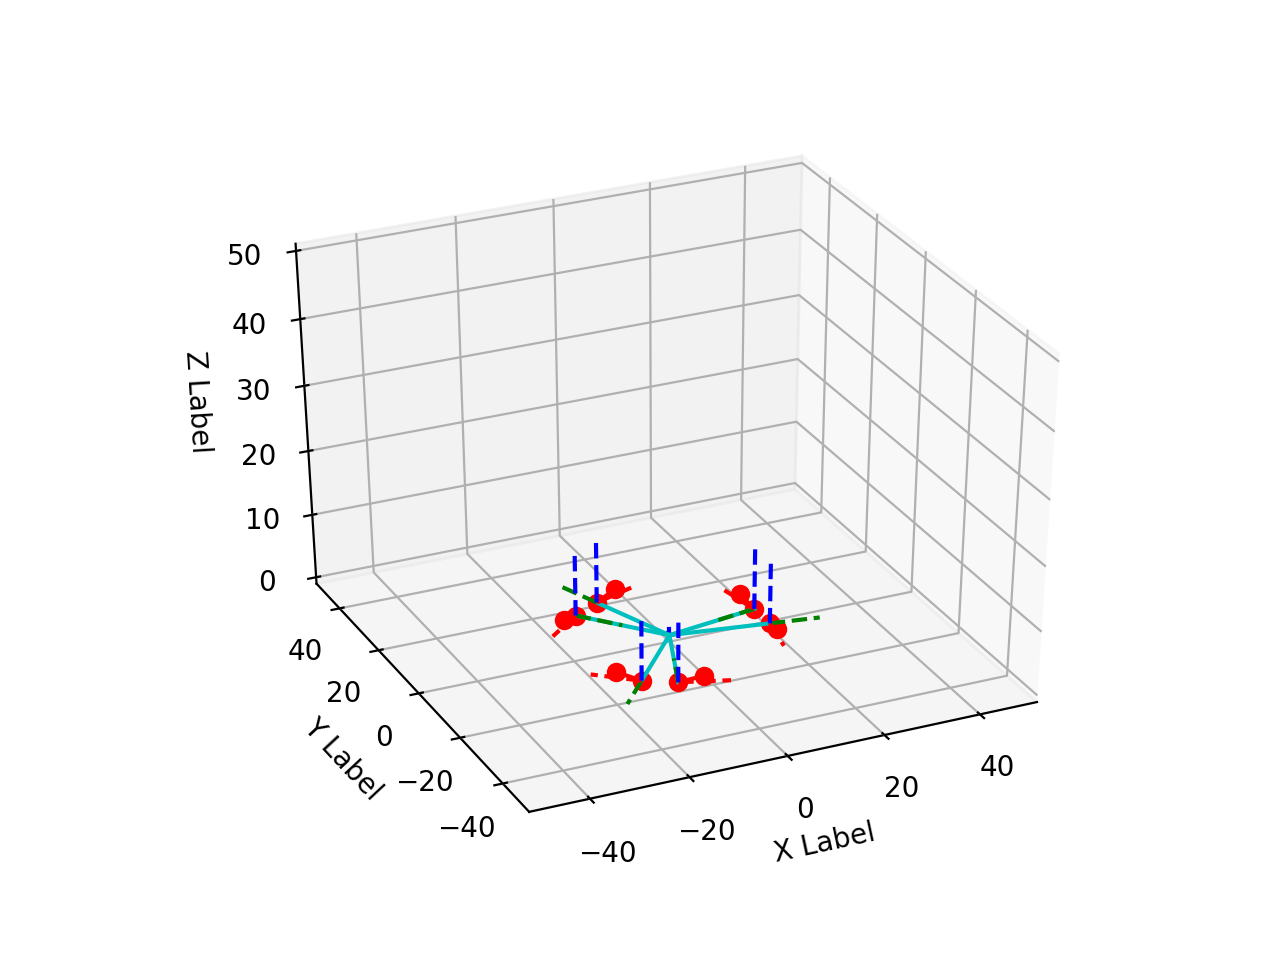

In [287]:
% matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# draw unit axis
ax.plot([0,1], [0,0], [0,0], 'r-')
ax.plot([0,0], [0,1], [0,0], 'g-')
ax.plot([0,0], [0,0], [0,1], 'b-')

## Draw arm
for arm in List_arms:
    arm.draw(ax);
    arm.drawRefFrame(ax);
    

ax.set_xlim([-50,50])
ax.set_ylim([-50,50])
ax.set_zlim([0,50])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()